In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/17k-apple-app-store-strategy-games/appstore_games.csv


In [2]:

df=pd.read_csv("/kaggle/input/17k-apple-app-store-strategy-games/appstore_games.csv")
df.head(20)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,35.0,0.00,NaN,"""Gravitation is a new implementation of the pu...",Robert Farnum,4+,NaN,6328320.0,Games,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013
7,https://apps.apple.com/us/app/colony/id286363959,286363959,Colony,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,125.0,0.99,NaN,"""50 levels of addictive puzzling strategy fun!...",Chris Haynes,4+,EN,64333824.0,Games,"Games, Strategy, Board",3/08/2008,3/10/2018
8,https://apps.apple.com/us/app/carte/id286566987,286566987,Carte,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,2.5,44.0,0.00,NaN,"""Jeu simple qui consiste \xe0 trouver comment ...",Jean-Francois Pautex,4+,FR,2657280.0,Games,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,0.00,NaN,Barrels O\u2019 Fun is a simple but challengin...,BesqWare,4+,EN,1466515.0,Games,"Games, Casual, Strategy",1/08/2008,1/08/2008


In [3]:
#Summary Statistics Of Numerical Columns
df.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


In [4]:
#Check for missing values
df.isnull().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [5]:
#Removing rows with missing values
df.dropna(inplace=True)

**EDA**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


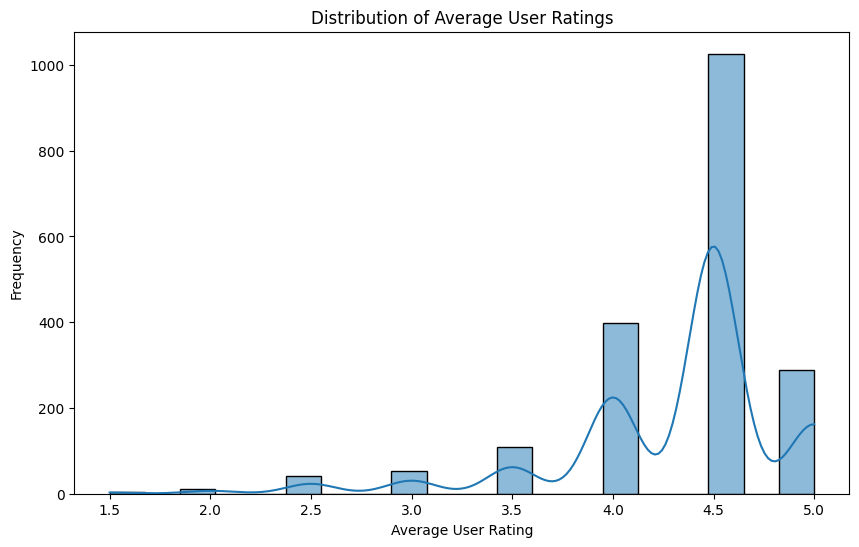

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of average user ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Average User Rating'], bins=20, kde=True)
plt.title('Distribution of Average User Ratings')
plt.xlabel('Average User Rating')
plt.ylabel('Frequency')
plt.show()

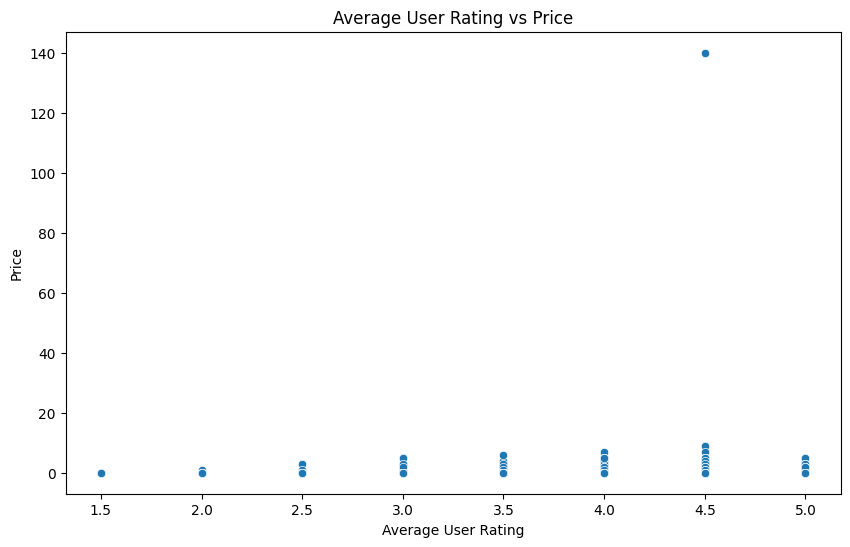

In [7]:
# Relationship between Average User Rating and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Average User Rating', y='Price')
plt.title('Average User Rating vs Price')
plt.show()

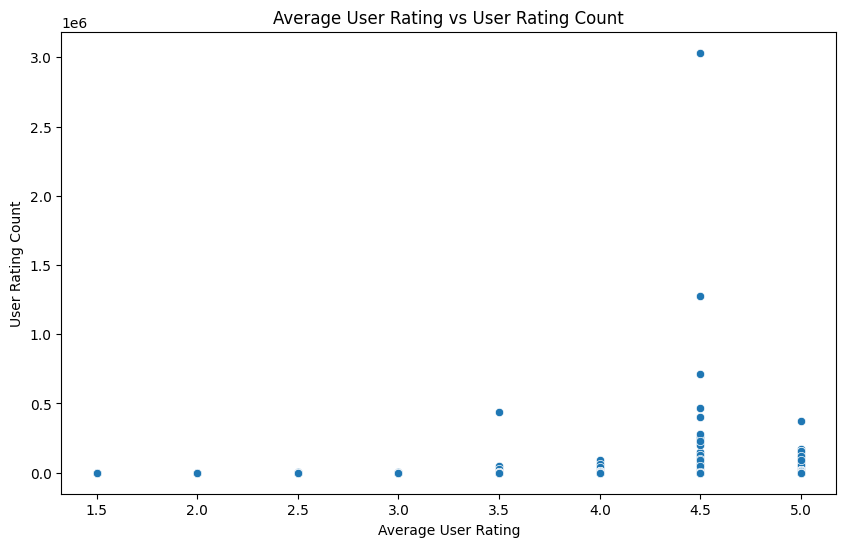

In [8]:
# Relationship between Average User Rating and User Rating Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Average User Rating', y='User Rating Count')
plt.title('Average User Rating vs User Rating Count')
plt.show()

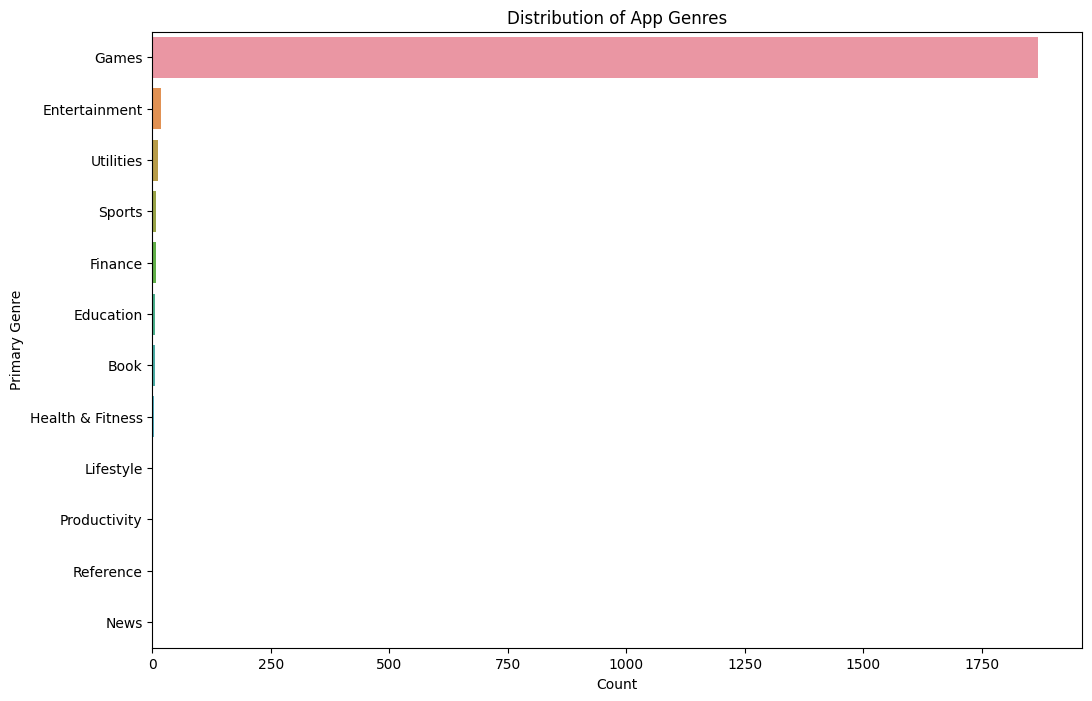

In [9]:
# Distribution of app genres
plt.figure(figsize=(12, 8))
sns.countplot(y='Primary Genre', data=df, order = df['Primary Genre'].value_counts().index)
plt.title('Distribution of App Genres')
plt.xlabel('Count')
plt.ylabel('Primary Genre')
plt.show()


**Feature Engineering For Data Cleaning**

In [10]:
from scipy.stats import norm
# Convert 'Price' column to numeric after removing '$' sign
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

In [11]:
# Data cleaning (Outlier detection using IQR)
numerical_cols = ['Average User Rating', 'User Rating Count', 'Price']
cleaned_df = df.copy()

In [12]:
for col in numerical_cols:
    Q1 = cleaned_df[col].quantile(0.25)
    Q3 = cleaned_df[col].quantile(0.75)
    IQR = Q3 - Q1
    cleaned_df = cleaned_df[~((cleaned_df[col] < (Q1 - 1.5 * IQR)) | (cleaned_df[col] > (Q3 + 1.5 * IQR)))]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


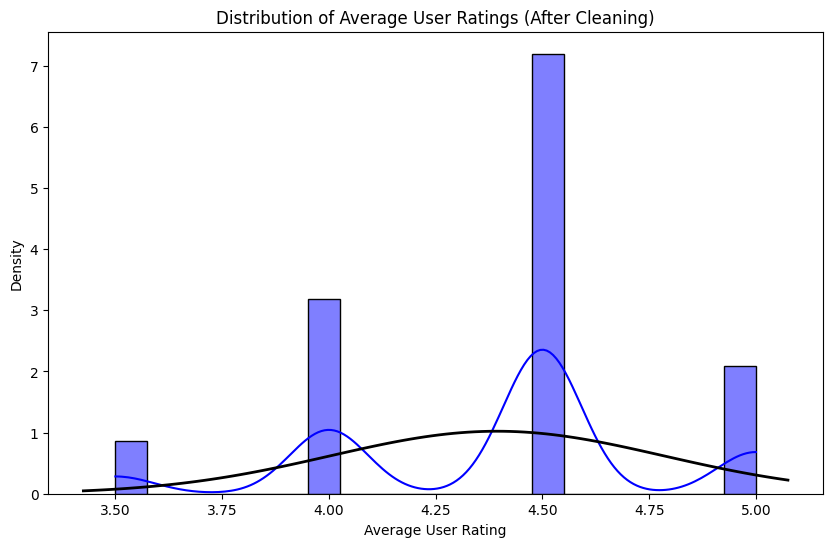

In [13]:
# Visualize the distribution of average user ratings after cleaning
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['Average User Rating'], bins=20, kde=True, color='blue', stat='density')
mu, sigma = norm.fit(cleaned_df['Average User Rating'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribution of Average User Ratings (After Cleaning)')
plt.xlabel('Average User Rating')
plt.ylabel('Density')
plt.show()

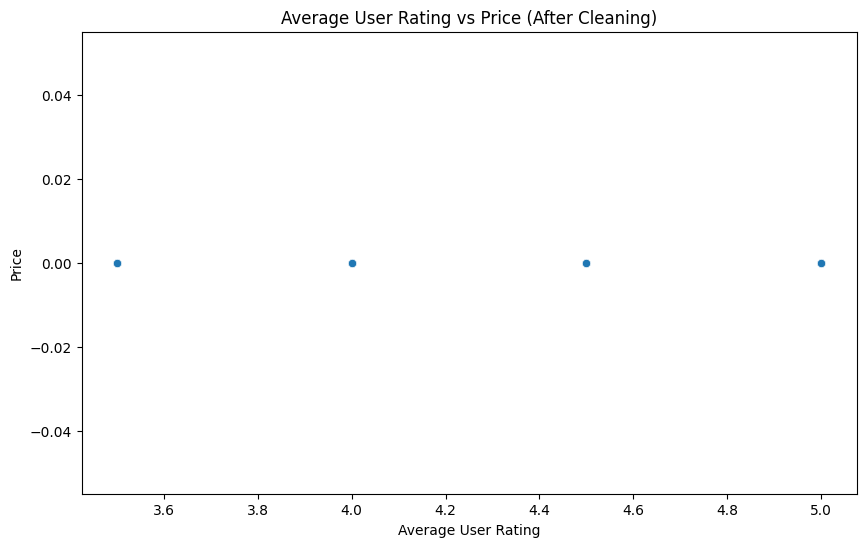

In [14]:
# Relationship between Average User Rating and Price after cleaning
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='Average User Rating', y='Price')
plt.title('Average User Rating vs Price (After Cleaning)')
plt.show()

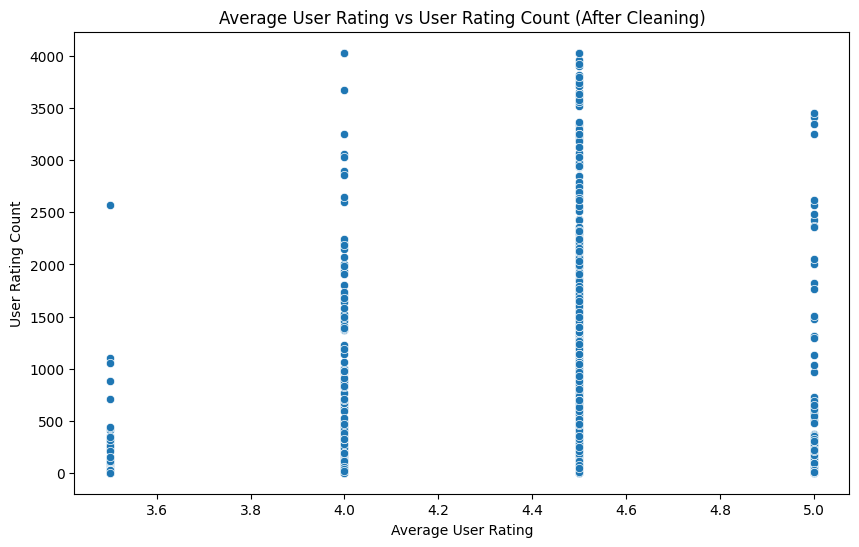

In [15]:
# Relationship between Average User Rating and User Rating Count after cleaning
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='Average User Rating', y='User Rating Count')
plt.title('Average User Rating vs User Rating Count (After Cleaning)')
plt.show()


In [16]:
# Calculate correlation matrix for numerical columns only
numerical_corr = cleaned_df[numerical_cols].corr()

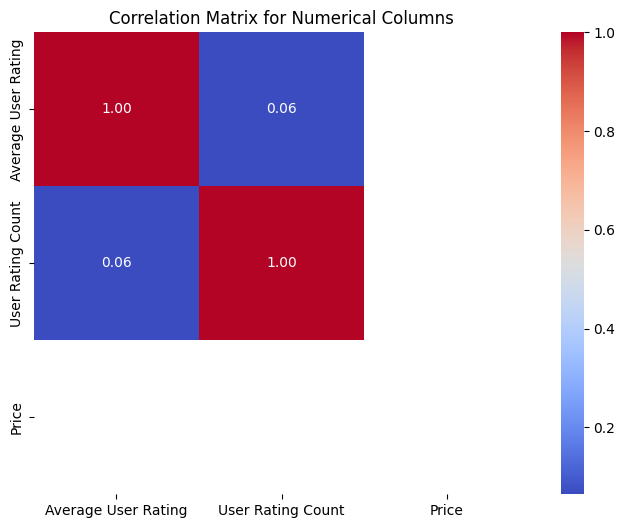

In [17]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

**MACHINE LEARNING**

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define features and target variable
X = df[['User Rating Count', 'Price']]
y = df['Average User Rating']

In [19]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [21]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [22]:
# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [23]:
# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

In [24]:
# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
# Evaluate the model
y_pred_train = rf_regressor.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_rmse

0.45761839658344683

In [26]:
y_pred_test = rf_regressor.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_rmse

0.593590594672719

In [27]:
# Print cross-validation RMSE scores
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", np.mean(cv_rmse_scores))

Cross-validation RMSE scores: [0.56025629 0.6240582  0.64082243 0.6142221  0.65041078]
Mean CV RMSE: 0.6179539619623541


In [28]:
# Feature importances
feature_importances = rf_regressor.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [0.55330018 0.44669982]
